# Ridge - Lasso - Elastic Net 

## 1. Load packages

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

from yellowbrick.regressor import AlphaSelection

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## 2. Prepare data 

In [4]:
df = pd.read_csv("C:/Users/julie/supervised_project/dataframe_PS_3.csv", index_col='Unnamed: 0')
df.head()

# print(df.columns.tolist())

X = df[['temp_DE', 'P_DE_lag1', 'Q_DE_lag1', 'P_FR_lag1', 'Q_FR_lag1', 'P_BE_lag1', 'Q_BE_lag1', 'P_ES_lag1', 'Q_ES_lag1', 'P_AT_lag1', 'Q_AT_lag1', 'P_NL_lag1', 'Q_NL_lag1', 'temp_DE_lag1', 'P_DE_lag2', 'Q_DE_lag2', 'P_FR_lag2', 'Q_FR_lag2', 'P_BE_lag2', 'Q_BE_lag2', 'P_ES_lag2', 'Q_ES_lag2', 'P_AT_lag2', 'Q_AT_lag2', 'P_NL_lag2', 'Q_NL_lag2', 'temp_DE_lag2', 'P_DE_lag3', 'Q_DE_lag3', 'P_FR_lag3', 'Q_FR_lag3', 'P_BE_lag3', 'Q_BE_lag3', 'P_ES_lag3', 'Q_ES_lag3', 'P_AT_lag3', 'Q_AT_lag3', 'P_NL_lag3', 'Q_NL_lag3', 'temp_DE_lag3', 'P_DE_lag4', 'Q_DE_lag4', 'P_FR_lag4', 'Q_FR_lag4', 'P_BE_lag4', 'Q_BE_lag4', 'P_ES_lag4', 'Q_ES_lag4', 'P_AT_lag4', 'Q_AT_lag4', 'P_NL_lag4', 'Q_NL_lag4', 'temp_DE_lag4', 'P_DE_lag5', 'Q_DE_lag5', 'P_FR_lag5', 'Q_FR_lag5', 'P_BE_lag5', 'Q_BE_lag5', 'P_ES_lag5', 'Q_ES_lag5', 'P_AT_lag5', 'Q_AT_lag5', 'P_NL_lag5', 'Q_NL_lag5', 'temp_DE_lag5', 'P_DE_lag6', 'Q_DE_lag6', 'P_FR_lag6', 'Q_FR_lag6', 'P_BE_lag6', 'Q_BE_lag6', 'P_ES_lag6', 'Q_ES_lag6', 'P_AT_lag6', 'Q_AT_lag6', 'P_NL_lag6', 'Q_NL_lag6', 'temp_DE_lag6', 'P_DE_lag7', 'Q_DE_lag7', 'P_FR_lag7', 'Q_FR_lag7', 'P_BE_lag7', 'Q_BE_lag7', 'P_ES_lag7', 'Q_ES_lag7', 'P_AT_lag7', 'Q_AT_lag7', 'P_NL_lag7', 'Q_NL_lag7', 'temp_DE_lag7', 'P_DE_lag8', 'Q_DE_lag8', 'P_FR_lag8', 'Q_FR_lag8', 'P_BE_lag8', 'Q_BE_lag8', 'P_ES_lag8', 'Q_ES_lag8', 'P_AT_lag8', 'Q_AT_lag8', 'P_NL_lag8', 'Q_NL_lag8', 'temp_DE_lag8', 'P_DE_lag9', 'Q_DE_lag9', 'P_FR_lag9', 'Q_FR_lag9', 'P_BE_lag9', 'Q_BE_lag9', 'P_ES_lag9', 'Q_ES_lag9', 'P_AT_lag9', 'Q_AT_lag9', 'P_NL_lag9', 'Q_NL_lag9', 'temp_DE_lag9', 'P_DE_lag10', 'Q_DE_lag10', 'P_FR_lag10', 'Q_FR_lag10', 'P_BE_lag10', 'Q_BE_lag10', 'P_ES_lag10', 'Q_ES_lag10', 'P_AT_lag10', 'Q_AT_lag10', 'P_NL_lag10', 'Q_NL_lag10', 'temp_DE_lag10', 'P_DE_lag11', 'Q_DE_lag11', 'P_FR_lag11', 'Q_FR_lag11', 'P_BE_lag11', 'Q_BE_lag11', 'P_ES_lag11', 'Q_ES_lag11', 'P_AT_lag11', 'Q_AT_lag11', 'P_NL_lag11', 'Q_NL_lag11', 'temp_DE_lag11', 'P_DE_lag12', 'Q_DE_lag12', 'P_FR_lag12', 'Q_FR_lag12', 'P_BE_lag12', 'Q_BE_lag12', 'P_ES_lag12', 'Q_ES_lag12', 'P_AT_lag12', 'Q_AT_lag12', 'P_NL_lag12', 'Q_NL_lag12', 'temp_DE_lag12', 'P_DE_lag13', 'Q_DE_lag13', 'P_FR_lag13', 'Q_FR_lag13', 'P_BE_lag13', 'Q_BE_lag13', 'P_ES_lag13', 'Q_ES_lag13', 'P_AT_lag13', 'Q_AT_lag13', 'P_NL_lag13', 'Q_NL_lag13', 'temp_DE_lag13', 'P_DE_lag14', 'Q_DE_lag14', 'P_FR_lag14', 'Q_FR_lag14', 'P_BE_lag14', 'Q_BE_lag14', 'P_ES_lag14', 'Q_ES_lag14', 'P_AT_lag14', 'Q_AT_lag14', 'P_NL_lag14', 'Q_NL_lag14', 'temp_DE_lag14', 'P_DE_lag15', 'Q_DE_lag15', 'P_FR_lag15', 'Q_FR_lag15', 'P_BE_lag15', 'Q_BE_lag15', 'P_ES_lag15', 'Q_ES_lag15', 'P_AT_lag15', 'Q_AT_lag15', 'P_NL_lag15', 'Q_NL_lag15', 'temp_DE_lag15', 'P_DE_lag16', 'Q_DE_lag16', 'P_FR_lag16', 'Q_FR_lag16', 'P_BE_lag16', 'Q_BE_lag16', 'P_ES_lag16', 'Q_ES_lag16', 'P_AT_lag16', 'Q_AT_lag16', 'P_NL_lag16', 'Q_NL_lag16', 'temp_DE_lag16', 'P_DE_lag17', 'Q_DE_lag17', 'P_FR_lag17', 'Q_FR_lag17', 'P_BE_lag17', 'Q_BE_lag17', 'P_ES_lag17', 'Q_ES_lag17', 'P_AT_lag17', 'Q_AT_lag17', 'P_NL_lag17', 'Q_NL_lag17', 'temp_DE_lag17', 'P_DE_lag18', 'Q_DE_lag18', 'P_FR_lag18', 'Q_FR_lag18', 'P_BE_lag18', 'Q_BE_lag18', 'P_ES_lag18', 'Q_ES_lag18', 'P_AT_lag18', 'Q_AT_lag18', 'P_NL_lag18', 'Q_NL_lag18', 'temp_DE_lag18', 'P_DE_lag19', 'Q_DE_lag19', 'P_FR_lag19', 'Q_FR_lag19', 'P_BE_lag19', 'Q_BE_lag19', 'P_ES_lag19', 'Q_ES_lag19', 'P_AT_lag19', 'Q_AT_lag19', 'P_NL_lag19', 'Q_NL_lag19', 'temp_DE_lag19', 'P_DE_lag20', 'Q_DE_lag20', 'P_FR_lag20', 'Q_FR_lag20', 'P_BE_lag20', 'Q_BE_lag20', 'P_ES_lag20', 'Q_ES_lag20', 'P_AT_lag20', 'Q_AT_lag20', 'P_NL_lag20', 'Q_NL_lag20', 'temp_DE_lag20', 'P_DE_lag21', 'Q_DE_lag21', 'P_FR_lag21', 'Q_FR_lag21', 'P_BE_lag21', 'Q_BE_lag21', 'P_ES_lag21', 'Q_ES_lag21', 'P_AT_lag21', 'Q_AT_lag21', 'P_NL_lag21', 'Q_NL_lag21', 'temp_DE_lag21', 'P_DE_lag22', 'Q_DE_lag22', 'P_FR_lag22', 'Q_FR_lag22', 'P_BE_lag22', 'Q_BE_lag22', 'P_ES_lag22', 'Q_ES_lag22', 'P_AT_lag22', 'Q_AT_lag22', 'P_NL_lag22', 'Q_NL_lag22', 'temp_DE_lag22', 'P_DE_lag23', 'Q_DE_lag23', 'P_FR_lag23', 'Q_FR_lag23', 'P_BE_lag23', 'Q_BE_lag23', 'P_ES_lag23', 'Q_ES_lag23', 'P_AT_lag23', 'Q_AT_lag23', 'P_NL_lag23', 'Q_NL_lag23', 'temp_DE_lag23', 'P_DE_lag24', 'Q_DE_lag24', 'P_FR_lag24', 'Q_FR_lag24', 'P_BE_lag24', 'Q_BE_lag24', 'P_ES_lag24', 'Q_ES_lag24', 'P_AT_lag24', 'Q_AT_lag24', 'P_NL_lag24', 'Q_NL_lag24', 'temp_DE_lag24', 'hour', 'day', 'month', 'year', 'weekday', 'season', 'temp', 'HDD', 'CDD']]
y = df['Q_DE']

#split the dataframe betweenn train and test 
X_train = X.iloc[:round(len(df)*0.75)]
y_train = y.iloc[:round(len(df)*0.75)]
X_test = X.iloc[round(len(df)*0.75)+1:]
y_test = y.iloc[round(len(df)*0.75)+1:]

## 3.1 Ridge: lambda selection
lambda in litterature = alpha in sklearn package 

In [78]:
# prepare a range of alpha values to test
alphas = 10**np.linspace(5,-2,100)*0.5
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring ='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print(grid)
# save alpha (lambda)
alpha = grid.best_estimator_.alpha
print(alpha)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([5.00000000e+04, 4.24876718e+04, 3.61040451e+04, 3.06795364e+04,
       2.60700414e+04, 2.21531073e+04, 1.88246790e+04, 1.59963357e+04,
       1.35929412e+04, 1.15506485e+04, 9.81520325e+03, 8.34050269e+03,
       7.08737081e+03, 6.02251770e+03, 5.11765511e+03, 4.34874501e+03,
       3.69536102e+03, 3.14014572e+03, 2.66834962e+03, 2.26743...
       2.11462144e-01, 1.79690683e-01, 1.52692775e-01, 1.29751211e-01,
       1.10256537e-01, 9.36908711e-02, 7.96141397e-02, 6.76523887e-02,
       5.74878498e-02, 4.88504979e-02, 4.15108784e-02, 3.52740116e-02,
       2.99742125e-02, 2.54706901e-02, 2.16438064e-02, 1.83918989e-02,
       1.56285792e-02, 1.32804389e-02, 1.12850986e-02, 9.58955131e-03,
       8.14875417e-03, 6.92443186e-03, 5.88405976e-03, 5.00000000e-03])},
             scoring='neg_root_mean_squared_error')
4.663016734416099


## 3.2 Ridge: coefficients regularization 

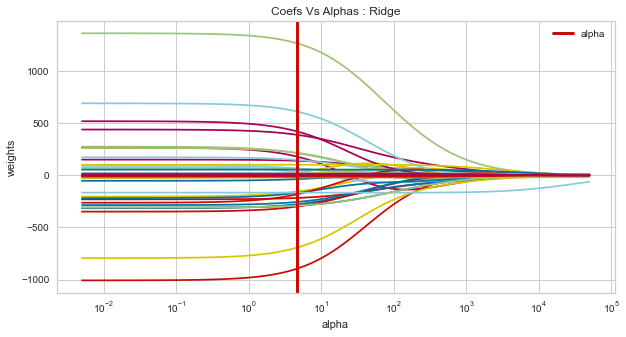

In [79]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    coefs.append(ridge.coef_)
    
plt.figure(0, figsize=(10,5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Coefs Vs Alphas : Ridge")
plt.axvline(x=alpha, c='r', lw=3, label='alpha')
plt.legend()
plt.show()

## 3.c Ridge : estimation

In [80]:
model = Ridge(alpha=alpha)
model.fit(X_train,y_train)
pred = model.predict(X_test)

## 3.d Ridge : evaluation

lambda is equal to: 4.663016734416099
Root mean squared error is equal to : 915.2072841739046
Mean Absolute percentage error is equal to: 1.0567343726836158


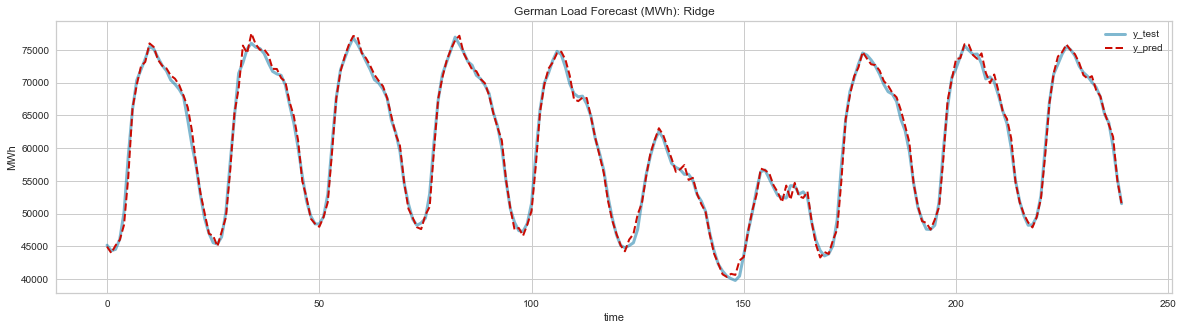

In [81]:
RMSE_ridge = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('lambda is equal to:', alpha)
print("Root mean squared error is equal to :",RMSE_ridge)
print("Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))


plt.figure(figsize=(20,5))
plt.plot(y_test.values[:240], c='b', label='y_test', lw=3, alpha=0.5)
plt.plot(pred[:240], '--', c='r', label='y_pred', lw=2)
plt.legend()
plt.title('German Load Forecast (MWh): Ridge')
plt.xlabel('time')
plt.ylabel('MWh')
plt.savefig('Ridgepred.png')

## 4.a Lasso : lambda selection 

In [84]:
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring ='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print(grid)
# save alpha 
alpha = grid.best_estimator_.alpha
print(alpha)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([5.00000000e+04, 4.24876718e+04, 3.61040451e+04, 3.06795364e+04,
       2.60700414e+04, 2.21531073e+04, 1.88246790e+04, 1.59963357e+04,
       1.35929412e+04, 1.15506485e+04, 9.81520325e+03, 8.34050269e+03,
       7.08737081e+03, 6.02251770e+03, 5.11765511e+03, 4.34874501e+03,
       3.69536102e+03, 3.14014572e+03, 2.66834962e+03, 2.26743...
       2.11462144e-01, 1.79690683e-01, 1.52692775e-01, 1.29751211e-01,
       1.10256537e-01, 9.36908711e-02, 7.96141397e-02, 6.76523887e-02,
       5.74878498e-02, 4.88504979e-02, 4.15108784e-02, 3.52740116e-02,
       2.99742125e-02, 2.54706901e-02, 2.16438064e-02, 1.83918989e-02,
       1.56285792e-02, 1.32804389e-02, 1.12850986e-02, 9.58955131e-03,
       8.14875417e-03, 6.92443186e-03, 5.88405976e-03, 5.00000000e-03])},
             scoring='neg_root_mean_squared_error')
53.61336110051616


## 4.b Lasso : coefficients regularization 

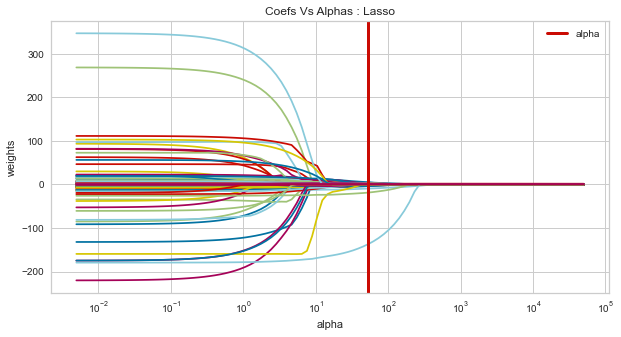

In [85]:
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    coefs.append(lasso.coef_)
    
plt.figure(0, figsize=(10,5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Coefs Vs Alphas : Lasso")
plt.axvline(x=alpha, c='r', lw=3, label='alpha')
plt.legend()
plt.show()

## 4.c Lasso : estimation 

In [86]:
model = Lasso(alpha=alpha)
model.fit(X_train,y_train)
pred = model.predict(X_test)

## 4.d Lasso : evaluation

lambda is equal to: 53.61336110051616
Root mean squared error is equal to : 945.2014401978419
Mean Absolute percentage error is equal to: 1.0845775892275775


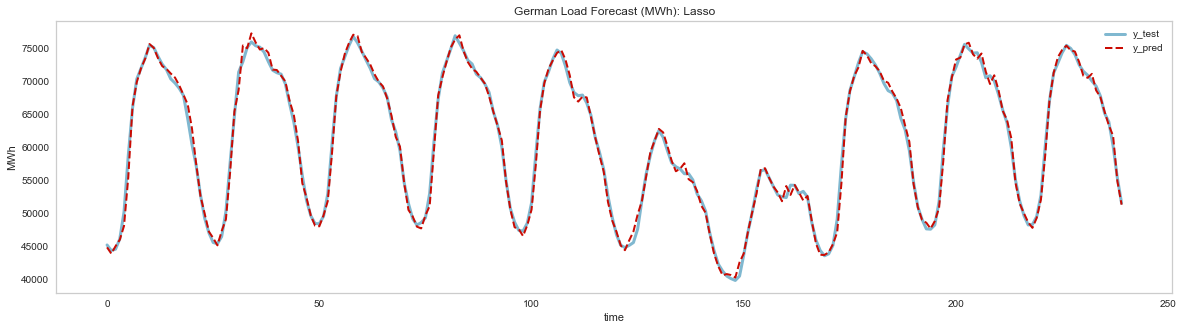

In [87]:
RMSE_lasso = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('lambda is equal to:', alpha)
print("Root mean squared error is equal to :",RMSE_lasso)
print("Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))


plt.figure(figsize=(20,5))
plt.plot(y_test.values[:240], c='b', label='y_test', lw=3, alpha=0.5)
plt.plot(pred[:240], '--', c='r', label='y_pred', lw=2)
plt.legend()
plt.grid()
plt.title('German Load Forecast (MWh): Lasso')
plt.xlabel('time')
plt.ylabel('MWh')
plt.savefig('Lassopred.png')

## 5.a Elastic net : lambda, l1 & l2 selection

In [88]:
model = ElasticNet()

parametersGrid = {"max_iter": [1, 5, 10],
                "alpha": 10**np.linspace(5,-2,100)*0.5,
                "l1_ratio": np.arange(0,1.1,0.1)}
    
grid = GridSearchCV(estimator=model, param_grid=parametersGrid, scoring ='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print(grid)
# save alpha 
alpha = grid.best_estimator_.alpha
l1 = grid.best_estimator_.l1_ratio
l2 = 1 - l1
print("alpha:",alpha)
print("l1 ratio:",l1)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([5.00000000e+04, 4.24876718e+04, 3.61040451e+04, 3.06795364e+04,
       2.60700414e+04, 2.21531073e+04, 1.88246790e+04, 1.59963357e+04,
       1.35929412e+04, 1.15506485e+04, 9.81520325e+03, 8.34050269e+03,
       7.08737081e+03, 6.02251770e+03, 5.11765511e+03, 4.34874501e+03,
       3.69536102e+03, 3.14014572e+03, 2.66834962e+03, 2....
       5.74878498e-02, 4.88504979e-02, 4.15108784e-02, 3.52740116e-02,
       2.99742125e-02, 2.54706901e-02, 2.16438064e-02, 1.83918989e-02,
       1.56285792e-02, 1.32804389e-02, 1.12850986e-02, 9.58955131e-03,
       8.14875417e-03, 6.92443186e-03, 5.88405976e-03, 5.00000000e-03]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_iter': [1, 5, 10]},
             scoring='neg_root_mean_squared_error')
alpha: 142.4017934217901
l1 ratio: 0.0


## 5.b Elastic net : coefficients regularization 

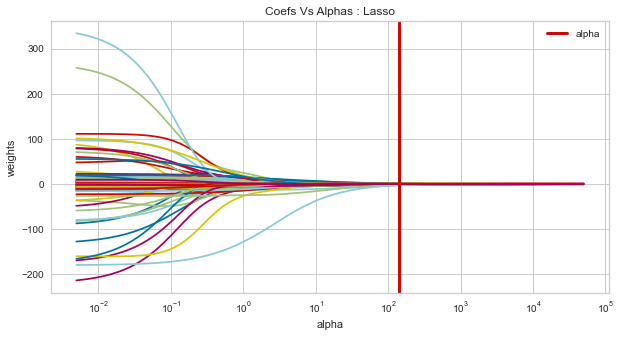

In [89]:
elasticn = ElasticNet()
coefs = []

for a in alphas:
    elasticn.set_params(alpha = a)
    elasticn.fit(X_train, y_train)
    pred = elasticn.predict(X_test)
    coefs.append(elasticn.coef_)
    
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Coefs Vs Alphas : Elastic Net")
plt.axvline(x=alpha, c='r', lw=3, label='alpha')
plt.legend()
plt.show()

## 5.c Elastic net: estimation 

In [90]:
model = ElasticNet(alpha=121.00641323971917, l1_ratio=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

## 5.d Elastic net: evaluation

lambda is equal to: 142.4017934217901
Root mean squared error is equal to : 961.3195143676403
Mean Absolute percentage error is equal to: 1.0953279492442494


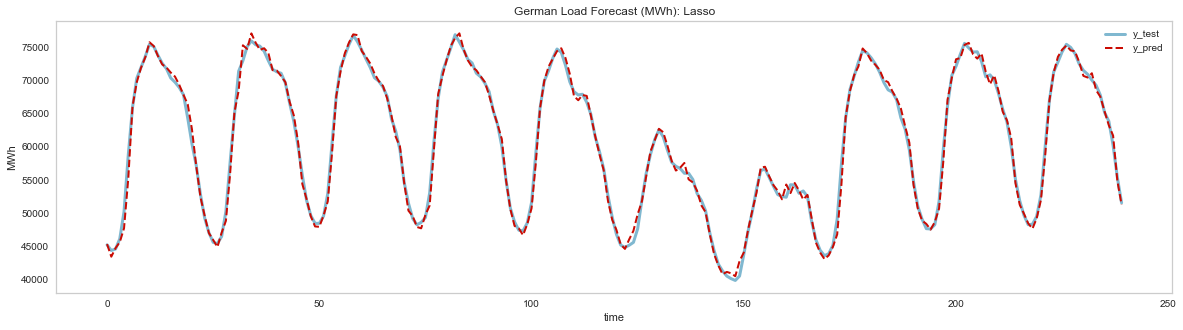

In [92]:
RMSE_EN = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('lambda is equal to:', alpha)
print("Root mean squared error is equal to :",RMSE_EN)
print("Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))

plt.figure(figsize=(20,5))
plt.plot(y_test.values[:240], c='b', label='y_test', lw=3, alpha=0.5)
plt.plot(pred[:240], '--', c='r', label='y_pred', lw=2)
plt.legend()
plt.grid()
plt.title('German Load Forecast (MWh): Elastic Net')
plt.xlabel('time')
plt.ylabel('MWh')
plt.savefig('ENpred.png')

## 6. How the results of penalized regression compares to OLS?

lambda is equal to: 142.4017934217901
Root mean squared error is equal to : 915.0639304133165
Mean Absolute percentage error is equal to: 1.0568424266710796


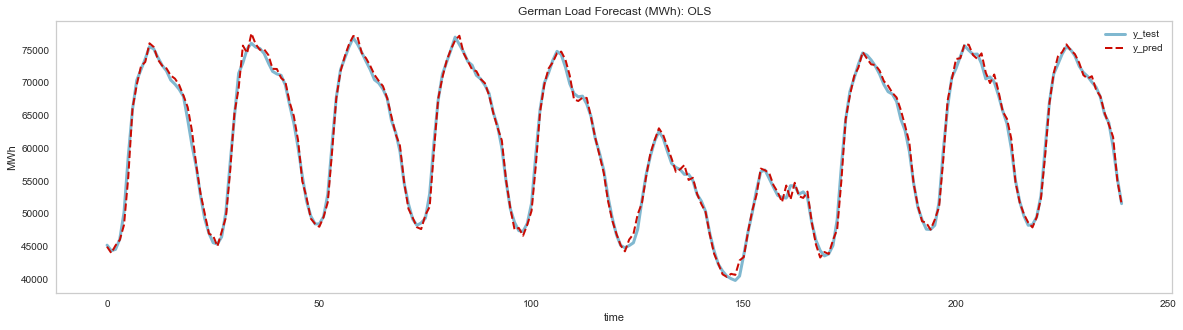

In [94]:
#OLS 
regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)
pred = model.predict(X_test.values)

RMSE_OLS = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('lambda is equal to:', alpha)
print("Root mean squared error is equal to :",RMSE_OLS)
print("Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))

plt.figure(figsize=(20,5))
plt.plot(y_test.values[:240], c='b', label='y_test', lw=3, alpha=0.5)
plt.plot(pred[:240], '--', c='r', label='y_pred', lw=2)
plt.legend()
plt.grid()
plt.title('German Load Forecast (MWh): OLS')
plt.xlabel('time')
plt.ylabel('MWh')
plt.savefig('OLSpred.png')

## 7. Do we improve penalized regressions results when N (# of features) > T (length of dataset) ? 

In [98]:
df1 = df.iloc[:480]

X = df1[['temp_DE', 'P_DE_lag1', 'Q_DE_lag1', 'P_FR_lag1', 'Q_FR_lag1', 'P_BE_lag1', 'Q_BE_lag1', 'P_ES_lag1', 'Q_ES_lag1', 'P_AT_lag1', 'Q_AT_lag1', 'P_NL_lag1', 'Q_NL_lag1', 'temp_DE_lag1', 'P_DE_lag2', 'Q_DE_lag2', 'P_FR_lag2', 'Q_FR_lag2', 'P_BE_lag2', 'Q_BE_lag2', 'P_ES_lag2', 'Q_ES_lag2', 'P_AT_lag2', 'Q_AT_lag2', 'P_NL_lag2', 'Q_NL_lag2', 'temp_DE_lag2', 'P_DE_lag3', 'Q_DE_lag3', 'P_FR_lag3', 'Q_FR_lag3', 'P_BE_lag3', 'Q_BE_lag3', 'P_ES_lag3', 'Q_ES_lag3', 'P_AT_lag3', 'Q_AT_lag3', 'P_NL_lag3', 'Q_NL_lag3', 'temp_DE_lag3', 'P_DE_lag4', 'Q_DE_lag4', 'P_FR_lag4', 'Q_FR_lag4', 'P_BE_lag4', 'Q_BE_lag4', 'P_ES_lag4', 'Q_ES_lag4', 'P_AT_lag4', 'Q_AT_lag4', 'P_NL_lag4', 'Q_NL_lag4', 'temp_DE_lag4', 'P_DE_lag5', 'Q_DE_lag5', 'P_FR_lag5', 'Q_FR_lag5', 'P_BE_lag5', 'Q_BE_lag5', 'P_ES_lag5', 'Q_ES_lag5', 'P_AT_lag5', 'Q_AT_lag5', 'P_NL_lag5', 'Q_NL_lag5', 'temp_DE_lag5', 'P_DE_lag6', 'Q_DE_lag6', 'P_FR_lag6', 'Q_FR_lag6', 'P_BE_lag6', 'Q_BE_lag6', 'P_ES_lag6', 'Q_ES_lag6', 'P_AT_lag6', 'Q_AT_lag6', 'P_NL_lag6', 'Q_NL_lag6', 'temp_DE_lag6', 'P_DE_lag7', 'Q_DE_lag7', 'P_FR_lag7', 'Q_FR_lag7', 'P_BE_lag7', 'Q_BE_lag7', 'P_ES_lag7', 'Q_ES_lag7', 'P_AT_lag7', 'Q_AT_lag7', 'P_NL_lag7', 'Q_NL_lag7', 'temp_DE_lag7', 'P_DE_lag8', 'Q_DE_lag8', 'P_FR_lag8', 'Q_FR_lag8', 'P_BE_lag8', 'Q_BE_lag8', 'P_ES_lag8', 'Q_ES_lag8', 'P_AT_lag8', 'Q_AT_lag8', 'P_NL_lag8', 'Q_NL_lag8', 'temp_DE_lag8', 'P_DE_lag9', 'Q_DE_lag9', 'P_FR_lag9', 'Q_FR_lag9', 'P_BE_lag9', 'Q_BE_lag9', 'P_ES_lag9', 'Q_ES_lag9', 'P_AT_lag9', 'Q_AT_lag9', 'P_NL_lag9', 'Q_NL_lag9', 'temp_DE_lag9', 'P_DE_lag10', 'Q_DE_lag10', 'P_FR_lag10', 'Q_FR_lag10', 'P_BE_lag10', 'Q_BE_lag10', 'P_ES_lag10', 'Q_ES_lag10', 'P_AT_lag10', 'Q_AT_lag10', 'P_NL_lag10', 'Q_NL_lag10', 'temp_DE_lag10', 'P_DE_lag11', 'Q_DE_lag11', 'P_FR_lag11', 'Q_FR_lag11', 'P_BE_lag11', 'Q_BE_lag11', 'P_ES_lag11', 'Q_ES_lag11', 'P_AT_lag11', 'Q_AT_lag11', 'P_NL_lag11', 'Q_NL_lag11', 'temp_DE_lag11', 'P_DE_lag12', 'Q_DE_lag12', 'P_FR_lag12', 'Q_FR_lag12', 'P_BE_lag12', 'Q_BE_lag12', 'P_ES_lag12', 'Q_ES_lag12', 'P_AT_lag12', 'Q_AT_lag12', 'P_NL_lag12', 'Q_NL_lag12', 'temp_DE_lag12', 'P_DE_lag13', 'Q_DE_lag13', 'P_FR_lag13', 'Q_FR_lag13', 'P_BE_lag13', 'Q_BE_lag13', 'P_ES_lag13', 'Q_ES_lag13', 'P_AT_lag13', 'Q_AT_lag13', 'P_NL_lag13', 'Q_NL_lag13', 'temp_DE_lag13', 'P_DE_lag14', 'Q_DE_lag14', 'P_FR_lag14', 'Q_FR_lag14', 'P_BE_lag14', 'Q_BE_lag14', 'P_ES_lag14', 'Q_ES_lag14', 'P_AT_lag14', 'Q_AT_lag14', 'P_NL_lag14', 'Q_NL_lag14', 'temp_DE_lag14', 'P_DE_lag15', 'Q_DE_lag15', 'P_FR_lag15', 'Q_FR_lag15', 'P_BE_lag15', 'Q_BE_lag15', 'P_ES_lag15', 'Q_ES_lag15', 'P_AT_lag15', 'Q_AT_lag15', 'P_NL_lag15', 'Q_NL_lag15', 'temp_DE_lag15', 'P_DE_lag16', 'Q_DE_lag16', 'P_FR_lag16', 'Q_FR_lag16', 'P_BE_lag16', 'Q_BE_lag16', 'P_ES_lag16', 'Q_ES_lag16', 'P_AT_lag16', 'Q_AT_lag16', 'P_NL_lag16', 'Q_NL_lag16', 'temp_DE_lag16', 'P_DE_lag17', 'Q_DE_lag17', 'P_FR_lag17', 'Q_FR_lag17', 'P_BE_lag17', 'Q_BE_lag17', 'P_ES_lag17', 'Q_ES_lag17', 'P_AT_lag17', 'Q_AT_lag17', 'P_NL_lag17', 'Q_NL_lag17', 'temp_DE_lag17', 'P_DE_lag18', 'Q_DE_lag18', 'P_FR_lag18', 'Q_FR_lag18', 'P_BE_lag18', 'Q_BE_lag18', 'P_ES_lag18', 'Q_ES_lag18', 'P_AT_lag18', 'Q_AT_lag18', 'P_NL_lag18', 'Q_NL_lag18', 'temp_DE_lag18', 'P_DE_lag19', 'Q_DE_lag19', 'P_FR_lag19', 'Q_FR_lag19', 'P_BE_lag19', 'Q_BE_lag19', 'P_ES_lag19', 'Q_ES_lag19', 'P_AT_lag19', 'Q_AT_lag19', 'P_NL_lag19', 'Q_NL_lag19', 'temp_DE_lag19', 'P_DE_lag20', 'Q_DE_lag20', 'P_FR_lag20', 'Q_FR_lag20', 'P_BE_lag20', 'Q_BE_lag20', 'P_ES_lag20', 'Q_ES_lag20', 'P_AT_lag20', 'Q_AT_lag20', 'P_NL_lag20', 'Q_NL_lag20', 'temp_DE_lag20', 'P_DE_lag21', 'Q_DE_lag21', 'P_FR_lag21', 'Q_FR_lag21', 'P_BE_lag21', 'Q_BE_lag21', 'P_ES_lag21', 'Q_ES_lag21', 'P_AT_lag21', 'Q_AT_lag21', 'P_NL_lag21', 'Q_NL_lag21', 'temp_DE_lag21', 'P_DE_lag22', 'Q_DE_lag22', 'P_FR_lag22', 'Q_FR_lag22', 'P_BE_lag22', 'Q_BE_lag22', 'P_ES_lag22', 'Q_ES_lag22', 'P_AT_lag22', 'Q_AT_lag22', 'P_NL_lag22', 'Q_NL_lag22', 'temp_DE_lag22', 'P_DE_lag23', 'Q_DE_lag23', 'P_FR_lag23', 'Q_FR_lag23', 'P_BE_lag23', 'Q_BE_lag23', 'P_ES_lag23', 'Q_ES_lag23', 'P_AT_lag23', 'Q_AT_lag23', 'P_NL_lag23', 'Q_NL_lag23', 'temp_DE_lag23', 'P_DE_lag24', 'Q_DE_lag24', 'P_FR_lag24', 'Q_FR_lag24', 'P_BE_lag24', 'Q_BE_lag24', 'P_ES_lag24', 'Q_ES_lag24', 'P_AT_lag24', 'Q_AT_lag24', 'P_NL_lag24', 'Q_NL_lag24', 'temp_DE_lag24', 'hour', 'day', 'month', 'year', 'weekday', 'season', 'temp', 'HDD', 'CDD']]
y = df1['Q_DE']

X_train = X.iloc[:round(len(df1)*0.75)]
y_train = y.iloc[:round(len(df1)*0.75)]
X_test = X.iloc[round(len(df1)*0.75):]
y_test = y.iloc[round(len(df1)*0.75):]

In [100]:
#Ridge 
model = Ridge(alpha=4.663016734416099)
model.fit(X_train,y_train)
pred = model.predict(X_test)

RMSE_ridge_2 = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Ridge Root mean squared error is equal to :",RMSE_ridge_2)
print("Ridge Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))

Ridge Root mean squared error is equal to : 2466.173870280355
Ridge Mean Absolute percentage error is equal to: 3.2689115230597596


In [101]:
# Lasso 
model = Lasso(alpha=53.61336110051616)
model.fit(X_train,y_train)
pred = model.predict(X_test)

RMSE_Lasso_2 = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Lasso Root mean squared error is equal to :",RMSE_Lasso_2)
print("Lasso Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))

Ridge Root mean squared error is equal to : 1525.672971696131
Ridge Mean Absolute percentage error is equal to: 1.8665280867403822


In [105]:
# Elastic net 
model = ElasticNet(alpha=121.00641323971917, l1_ratio=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

RMSE_EN_2 = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Elastic Net Root mean squared error is equal to :",RMSE_EN_2)
print("Elastic Net Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))

Elastic Net Root mean squared error is equal to : 1276.8092325456662
Elastic Net Absolute percentage error is equal to: 1.4078419996060112


In [107]:
#OLS 
regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)
pred = model.predict(X_test.values)

RMSE_OLS_2 = np.sqrt(mean_squared_error(y_test, pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("OLS Root mean squared error is equal to :",RMSE_OLS_2)
print("OLS Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, pred))

Ridge Root mean squared error is equal to : 3314.0801336947334
Ridge Mean Absolute percentage error is equal to: 4.24143564179063
